In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df=pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
le=LabelEncoder()

df['parental level of education']=le.fit_transform(df['parental level of education'])
df['test preparation course']=le.fit_transform(df['test preparation course'])

In [4]:
df['final_exam_score']=(df['math score'] + df['reading score'] + df['writing score'])/3

In [5]:
np.random.seed(42)

df['study_hours']=np.random.randint(1, 6, size=len(df))      # 1–5 hrs
df['attendance']=np.random.randint(60, 100, size=len(df))    # %
df['sleep_hours']=np.random.randint(5, 9, size=len(df))      # 5–8 hrs

In [6]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [7]:
X=df[['study_hours',
     'attendance',
     'parental level of education',
     'test preparation course',
     'sleep_hours']]

y=df['final_exam_score']

In [8]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
model=LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [11]:
y_pred=model.predict(X_test)

In [12]:
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MSE: 207.05407001047286
RMSE: 14.389373510006363
R² Score: 0.03411211351611809


In [13]:
coefficients=pd.DataFrame({'Feature': X.columns,'Coefficient': model.coef_})

coefficients

,Feature,Coefficient
0,study_hours,0.232854
1,attendance,-0.402584
2,parental level of education,-1.011591
3,test preparation course,-3.846420
4,sleep_hours,0.863027


In [14]:
coefficients.sort_values(by='Coefficient', key=abs, ascending=False)

,Feature,Coefficient
3,test preparation course,-3.846420
2,parental level of education,-1.011591
4,sleep_hours,0.863027
1,attendance,-0.402584
0,study_hours,0.232854


In [15]:
ridge=Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

ridge_pred=ridge.predict(X_test)
print("Ridge R²:", r2_score(y_test, ridge_pred))

lasso=Lasso(alpha=0.01)
lasso.fit(X_train, y_train)                            

lasso_pred=lasso.predict(X_test)
print("Lasso R²:", r2_score(y_test, lasso_pred))

Ridge R²: 0.0341517258208468
Lasso R²: 0.03431998082853116


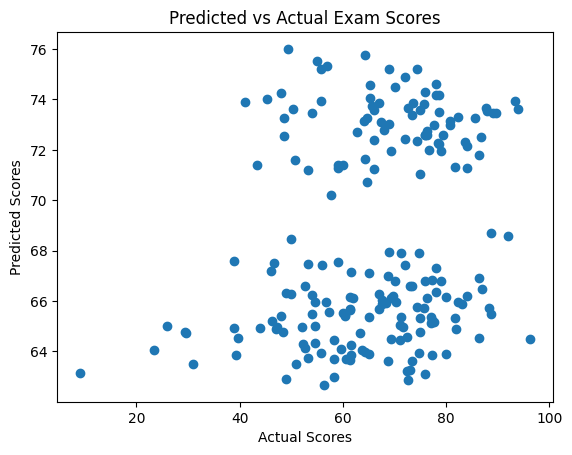

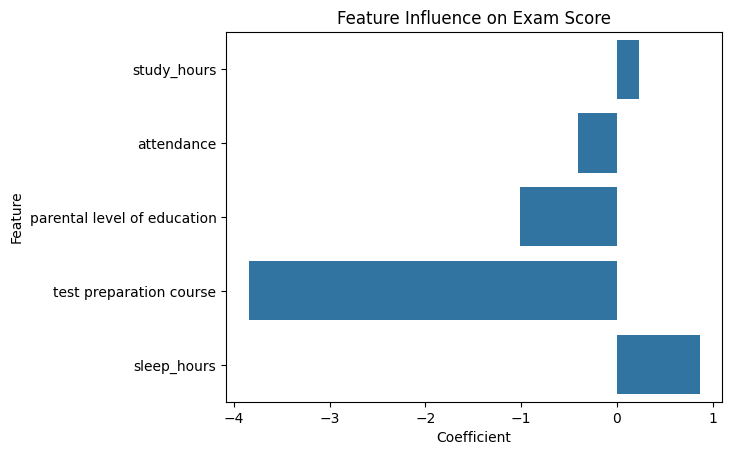

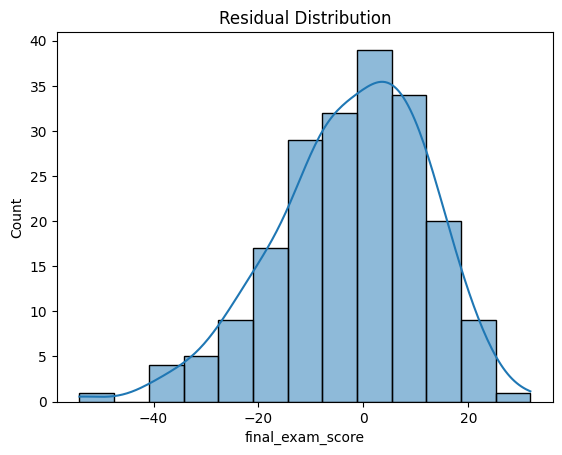

In [ ]:
plt.figure()
plt.plot(y_test.values, label="Actual Score")
plt.plot(y_pred, label="Predicted Score")
plt.xlabel("Student Index")
plt.ylabel("Score")
plt.title("Actual vs Predicted Exam Scores")
plt.legend()
plt.show()

sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title("Feature Influence on Exam Score")
plt.show()

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()
